# Understandning the Problem

To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. In the section below,I will perform exploratory data analysis (EDA) on the dataset in order to get a better understanding of the data before applying Machine Learning techniques.

# Import useful libraries

In [1]:
#Data manipulation and data wrangling
import pandas as pd
#Mathematical computations
import numpy as np
#Data vizualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
df=pd.read_csv('onlinefraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Dataset Preview

In [4]:
# Shape of the data
print('The Online Fraud Detection dataset has {} observations and {} columns.'.format(df.shape[0],df.shape[1]))

The Online Fraud Detection dataset has 6362620 observations and 11 columns.


In [5]:
# Preview of the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
#General info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#Categorical features
cat_col=df.select_dtypes(include=['object','bool']).columns
cat_col

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [8]:
# Numerical features
num_col=df.select_dtypes(include=[int,float]).columns
num_col

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [9]:
#Statistical preview
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Cleaning 

In [10]:
#Check for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The data is already clean 

In [11]:
# Convert feature names to lowercase
df.columns=df.columns.str.lower()

# Exploaratory Data Analysis

In [12]:
# Target variable distribution
df['isfraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isfraud, dtype: float64

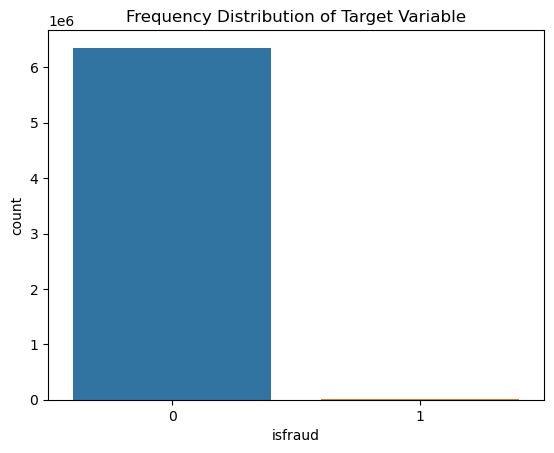

In [13]:
sns.countplot(data=df,x='isfraud')
plt.title('Frequency Distribution of Target Variable');

The data is highly imabalanced with about 99.8%  of the observations being non-fraudulent.This will be taken into consideration when building the ML models. Resampling techniqued might help improve models.

# Are there any clear relationships between features?

In [14]:
df.corr()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceorg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceorig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalancedest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalancedest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isfraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isflaggedfraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


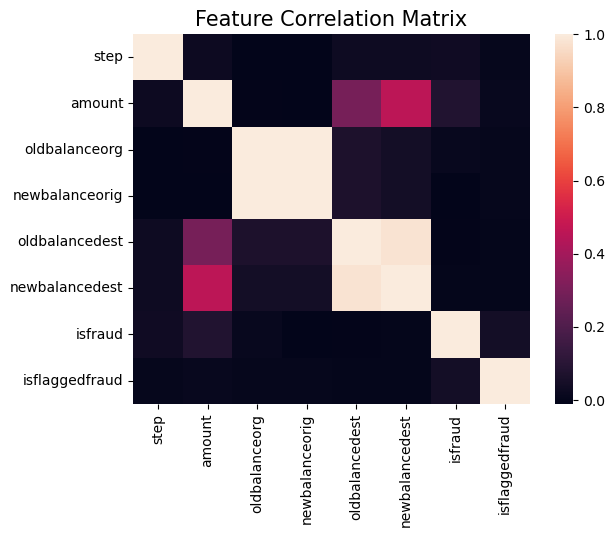

In [15]:
sns.heatmap(df.corr())
plt.title("Feature Correlation Matrix",size=15);

There are strong relationships between the "oldbalanceorg","newbalanceorig","oldbalancedest","newbalancedest".Lets check for individual correlations.

In [16]:
df.corr()['isfraud']

step              0.031578
amount            0.076688
oldbalanceorg     0.010154
newbalanceorig   -0.008148
oldbalancedest   -0.005885
newbalancedest    0.000535
isfraud           1.000000
isflaggedfraud    0.044109
Name: isfraud, dtype: float64

# Does the transaction type give info about fraud?

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameorig', 'oldbalanceorg', 'newbalanceorig',
       'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud',
       'isflaggedfraud'],
      dtype='object')

In [18]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

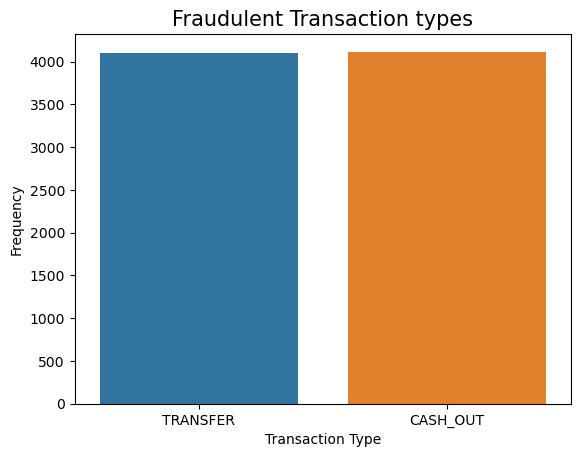

In [19]:
sns.countplot(data=df[df['isfraud']==1],x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Fraudulent Transaction types',size=15);

In [20]:
df[df['isfraud']==1]['type'].value_counts(normalize=True)

CASH_OUT    0.501157
TRANSFER    0.498843
Name: type, dtype: float64

We can deduce that the Transfer and Cash out transaction types are more likely to be fraudulent transactions

# Feature Engineering

In [21]:
#Does the amount of money involved influence or correlate to whether a transaction is fraudulent or not?
df.columns

Index(['step', 'type', 'amount', 'nameorig', 'oldbalanceorg', 'newbalanceorig',
       'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud',
       'isflaggedfraud'],
      dtype='object')

In [22]:
df['amt_sent']=df['oldbalanceorg']-df['newbalanceorig']
df['amt_recvd']=df['newbalancedest']-df['oldbalancedest']

In [23]:
df.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud,amt_sent,amt_recvd
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [24]:
df.corr()['isfraud']

step              0.031578
amount            0.076688
oldbalanceorg     0.010154
newbalanceorig   -0.008148
oldbalancedest   -0.005885
newbalancedest    0.000535
isfraud           1.000000
isflaggedfraud    0.044109
amt_sent          0.362472
amt_recvd         0.027028
Name: isfraud, dtype: float64

The newly created feature gives a better spearman correlation to the target variable compared to the initial features.

# Multicollinearity

In [25]:
# Drop highly correlated features to avoid multicollinearity
df=df.drop(columns=['newbalanceorig','newbalancedest'])

# High Cardinality for Categorical Variables

In [26]:
df[list(cat_col.str.lower())].nunique()

type              5
nameorig    6353307
namedest    2722362
dtype: int64

In [27]:
# Drop high cardinal features
df=df.drop(columns=['nameorig','namedest','type'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceorg   float64
 3   oldbalancedest  float64
 4   isfraud         int64  
 5   isflaggedfraud  int64  
 6   amt_sent        float64
 7   amt_recvd       float64
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


In [29]:
#After data cleaning and preprocessing
print('The cleaned and preprocessed data contains {} obervations and {} columns'.format(df.shape[0],df.shape[1]))

The cleaned and preprocessed data contains 6362620 obervations and 8 columns


In [30]:
# from sklearn.compose import make_column_transformer
# transformer = make_column_transformer(
#     (OneHotEncoder(), categ_col))

# transformed = transformer.fit_transform(df)
# df = pd.DataFrame(
#     transformed, 
#     columns=transformer.get_feature_names()
# )

# Split

In [31]:
X=df.iloc[:2500,:].drop('isfraud',axis=1)
y=df['isfraud'].iloc[:2500]

In [32]:
#Split the data into a 70:30 train:test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print("X train shape=",X_train.shape)
print("X test shape=",X_test.shape)
print("y train shape=",y_train.shape)
print("y test shape=",y_test.shape)

X train shape= (1750, 7)
X test shape= (750, 7)
y train shape= (1750,)
y test shape= (750,)


In [34]:
categ_col=list(X_train.select_dtypes(include=['object']).columns)
numer_cols=list(X_train.select_dtypes(include=[float,int]).columns)
numer_cols

['step',
 'amount',
 'oldbalanceorg',
 'oldbalancedest',
 'isflaggedfraud',
 'amt_sent',
 'amt_recvd']

In [35]:
# Column transformers
categorical_transformer=OneHotEncoder(handle_unknown='ignore')
preprocessor=ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categ_col)
    ]
)

# ML Model Building

In [36]:
#Baseline score
base_score=y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score=',base_score)

Baseline Accuracy Score= 0.9937142857142857


In [37]:
#Build models using ML pipelines
# rf=make_pipeline(
#     preprocessor,
#     RandomForestClassifier(random_state=42)
# )
# rf.fit(X_train,y_train)

ValueError: Found array with 0 feature(s) (shape=(1750, 0)) while a minimum of 1 is required by RandomForestClassifier.

In [ ]:
xgb_clf=make_pipeline(
    preprocessor,
    XGBClassifier(random_state=42)
)
xgb_clf.fit(X_train,y_train)

In [ ]:
y_pred=xgb_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

# Hyperparameter tuning 

In [38]:
# Create a dictionary of hyperparameter values to search
params_rf={
    "n_estimators":[100,300,500],
    "max_depth":[2,4,5,7],
    "ccp_alpha":[0.1,0.01,0.001]
}
rf=RandomForestClassifier(random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV
#Create the gridsearch object
GS=GridSearchCV(
    estimator=rf,
    param_grid=params_rf,
    scoring=['accuracy','precision'],
    refit='accuracy',
    cv=5,
    verbose=4
)

In [40]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [41]:
GS.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ccp_alpha=0.1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, n_estimators=100; accuracy: (test=0.991) precision: (test=0.000) total time=   0.1s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, n_estimators=300; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, n_estimators=300; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, n_estimators=300; accu

[CV 2/5] END ccp_alpha=0.01, max_depth=2, n_estimators=300; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s
[CV 3/5] END ccp_alpha=0.01, max_depth=2, n_estimators=300; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s
[CV 4/5] END ccp_alpha=0.01, max_depth=2, n_estimators=300; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s
[CV 5/5] END ccp_alpha=0.01, max_depth=2, n_estimators=300; accuracy: (test=0.991) precision: (test=0.000) total time=   0.4s
[CV 1/5] END ccp_alpha=0.01, max_depth=2, n_estimators=500; accuracy: (test=0.994) precision: (test=0.000) total time=   0.6s
[CV 2/5] END ccp_alpha=0.01, max_depth=2, n_estimators=500; accuracy: (test=0.994) precision: (test=0.000) total time=   0.7s
[CV 3/5] END ccp_alpha=0.01, max_depth=2, n_estimators=500; accuracy: (test=0.994) precision: (test=0.000) total time=   0.6s
[CV 4/5] END ccp_alpha=0.01, max_depth=2, n_estimators=500; accuracy: (test=0.994) precision: (test=0.000) total time=

[CV 2/5] END ccp_alpha=0.001, max_depth=2, n_estimators=500; accuracy: (test=0.994) precision: (test=0.000) total time=   0.7s
[CV 3/5] END ccp_alpha=0.001, max_depth=2, n_estimators=500; accuracy: (test=0.994) precision: (test=0.000) total time=   0.7s
[CV 4/5] END ccp_alpha=0.001, max_depth=2, n_estimators=500; accuracy: (test=0.994) precision: (test=0.000) total time=   0.7s
[CV 5/5] END ccp_alpha=0.001, max_depth=2, n_estimators=500; accuracy: (test=0.991) precision: (test=0.000) total time=   0.7s
[CV 1/5] END ccp_alpha=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END ccp_alpha=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END ccp_alpha=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 4/5] END ccp_alpha=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) tot

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'max_depth': [2, 4, 5, 7],
                         'n_estimators': [100, 300, 500]},
             refit='accuracy', scoring=['accuracy', 'precision'], verbose=4)

In [42]:
GS.best_params_

{'ccp_alpha': 0.001, 'max_depth': 7, 'n_estimators': 100}

In [43]:
GS.best_score_

0.9948571428571429

In [51]:
#XGBoost Classifier
params_xgb={
    "n_estimators":[100,200,400],
    "max_depth":[2,4,5,7,9],
    "gamma":[1,0.1,0.01,0.001],
    "learning_rate":[1,0.1,0.01,0.001]
}
xgb=XGBClassifier(random_state=42)

In [52]:
GS_xgb=GridSearchCV(
    estimator=xgb,
    param_grid=params_xgb,
    scoring=['accuracy','precision'],
    refit='accuracy',
    cv=5,
    verbose=4
)

In [53]:
GS_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END gamma=1, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 2/5] END gamma=1, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=1, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=1, max_depth=2, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 2/5] END gamma=1, learning_rate=1, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) tot

[CV 3/5] END gamma=1, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=1, max_depth=9, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=1, learning_rate=1, max_depth=9, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=1, learning_rate=1, max_depth=9, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=1, max_depth=9, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=1, max_depth

[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200; accuracy: (test=0.994) precision: (test=1.000) total time=   0.1s
[CV 1/5] END gamma=1, learning_rat

[CV 4/5] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.2s
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.2s
[CV 4/5] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.2s
[CV 5/5] END gamma=1, learning_rate=0.01, max_depth=5, n_estimators=200; accuracy: (test=0.991) precision: (test=0.000) total time=   0.2s
[CV 1/5] END gamma=1, learn

[CV 4/5] END gamma=1, learning_rate=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=0.001, max_depth=4, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=1, learning_rate=0.001, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=1, learning_rate=0.001, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 4/5] END gamma=1, learning_rate=0.001, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 5/5] END gamma=1, learning_rate=0.001, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=1.000) total time=   0.1s
[CV 1/5] END gamma=1

[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=2, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_r

[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=9, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=9, n_estimators=200; accuracy: (test=0.991) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=9, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=9, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_r

[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.991) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200; accuracy: (test=0.991) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 4/5] END gamma=0

[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.2s
[CV 4/5] END 

[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 4/

[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=400; accuracy: (test=0.994) precision: (test=1.000) total time=   0.3s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=0.01,

[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=7, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.2s
[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=7, n_estimators=400; accuracy: (test=0.994) precision: (test=1.000) total time=   0.2s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=1.000) precision: (test=1.000) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.991) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.01, le

[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.3s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.3s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=400; accuracy: (test=0.991) precision: (test=0.000) total time=   0.3s
[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.991) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=7, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END 

[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.4s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=4, n_estimators=400; accuracy: (test=0.991) precision: (test=0.000) total time=   0.4s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 3/

[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=1.000) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.3s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.3s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.3s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.3s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=400; accuracy: (test=0.994) precision: (test=1.000) total time=   0.3s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=4, n_estimators=100; accuracy: (test=0.997) precision: (test=1.000) total time=   0.0s

[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=200; accuracy: (test=0.994) precision: (test=1.000) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.3s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.3s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.3s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.3s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=400; accuracy: (test=0.994) precision: (test=1.000) total time=   0.3s

[CV 3/5] END gamma=0.001, learning_rate=1, max_depth=7, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 4/5] END gamma=0.001, learning_rate=1, max_depth=7, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 5/5] END gamma=0.001, learning_rate=1, max_depth=7, n_estimators=200; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=1, max_depth=7, n_estimators=400; accuracy: (test=1.000) precision: (test=1.000) total time=   0.2s
[CV 2/5] END gamma=0.001, learning_rate=1, max_depth=7, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.2s
[CV 3/5] END gamma=0.001, learning_rate=1, max_depth=7, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.2s
[CV 4/5] END gamma=0.001, learning_rate=1, max_depth=7, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.2s
[CV 5/5] END gamma=0

[CV 3/5] END gamma=0.001, learning_rate=0.1, max_depth=5, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.2s
[CV 4/5] END gamma=0.001, learning_rate=0.1, max_depth=5, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 5/5] END gamma=0.001, learning_rate=0.1, max_depth=5, n_estimators=200; accuracy: (test=0.994) precision: (test=1.000) total time=   0.1s
[CV 1/5] END gamma=0.001, learning_rate=0.1, max_depth=5, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.3s
[CV 2/5] END gamma=0.001, learning_rate=0.1, max_depth=5, n_estimators=400; accuracy: (test=0.991) precision: (test=0.000) total time=   0.3s
[CV 3/5] END gamma=0.001, learning_rate=0.1, max_depth=5, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.3s
[CV 4/5] END gamma=0.001, learning_rate=0.1, max_depth=5, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.3s
[CV 5/

[CV 1/5] END gamma=0.001, learning_rate=0.01, max_depth=4, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.2s
[CV 2/5] END gamma=0.001, learning_rate=0.01, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.2s
[CV 3/5] END gamma=0.001, learning_rate=0.01, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.2s
[CV 4/5] END gamma=0.001, learning_rate=0.01, max_depth=4, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.2s
[CV 5/5] END gamma=0.001, learning_rate=0.01, max_depth=4, n_estimators=200; accuracy: (test=0.991) precision: (test=0.000) total time=   0.2s
[CV 1/5] END gamma=0.001, learning_rate=0.01, max_depth=4, n_estimators=400; accuracy: (test=0.997) precision: (test=1.000) total time=   0.4s
[CV 2/5] END gamma=0.001, learning_rate=0.01, max_depth=4, n_estimators=400; accuracy: (test=0.994) precision: (test=0.000) total time=   0.4s

[CV 4/5] END gamma=0.001, learning_rate=0.001, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=0.001, learning_rate=0.001, max_depth=2, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=2, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=0.001, learning_rate=0.001, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 4/5] END gamma=0.001, learning_rate=0.001, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 5/5] END gamma=0.001, learning_rate=0.001, max_depth=2, n_estimators=200; accuracy: (test=0.994) precision: (test=1.000) total time=

[CV 2/5] END gamma=0.001, learning_rate=0.001, max_depth=9, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=9, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 4/5] END gamma=0.001, learning_rate=0.001, max_depth=9, n_estimators=100; accuracy: (test=0.994) precision: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=0.001, learning_rate=0.001, max_depth=9, n_estimators=100; accuracy: (test=0.994) precision: (test=1.000) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=9, n_estimators=200; accuracy: (test=0.997) precision: (test=1.000) total time=   0.1s
[CV 2/5] END gamma=0.001, learning_rate=0.001, max_depth=9, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=   0.1s
[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=9, n_estimators=200; accuracy: (test=0.994) precision: (test=0.000) total time=

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [1, 0.1, 0.01, 0.001],
                         'learning_rate': [1, 0.1, 0.01, 0.001],
                         'max_depth': [2, 4, 5, 7, 9],
                         'n_estimators': [100, 200, 400]},
             refit='accuracy', scoring=['accuracy', 'precision'], verbose=4)

In [54]:
GS_xgb.best_score_

0.9965714285714287